 # 10.7. PROJECT. Оценка эффективности новой фичи
 ## Для понимания эффективности новой фичи нужно
 - 1.Посчитать показатели Retention Rate седьмого дня и ARPPU за два периода: до и после внедрения фичи. 
 - 2.Сформировать выводы по анализу. 

! pip install psycopg2

In [1]:
%matplotlib inline
import pandas as pd # Для начала импортируем нужные нам библиотеки из базы данных
import numpy as np
import psycopg2
import psycopg2.extras 

In [84]:
def getRegisteredUsersCount5(): # Конструкция pd.DataFrame(getRegisteredUsersCount()) позволяет выполнить функцию запроса, а затем записать полученные данные в датафрейм
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count5 = pd.DataFrame(getRegisteredUsersCount5())

In [85]:
def getRegisteredUsersCount6(): # Конструкция pd.DataFrame(getRegisteredUsersCount()) позволяет выполнить функцию запроса, а затем записать полученные данные в датафрейм
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count6 = pd.DataFrame(getRegisteredUsersCount6())

In [86]:
registered_users_count5.info() # Получить информацию о датафрейме
registered_users_count6.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   registration_date       31 non-null     object
 1   registered_users_count  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   registration_date       30 non-null     object
 1   registered_users_count  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [87]:
# колонка registration_date имеет тип object (строковая переменная). Поэтому преобразуем её в тип datetime с помощью метода pd.to_datetime()
registered_users_count5['registration_date'] = pd.to_datetime(registered_users_count5['registration_date']) 
registered_users_count6['registration_date'] = pd.to_datetime(registered_users_count6['registration_date']) 

In [88]:
print(registered_users_count5['registered_users_count'].sum()) # Посмотрим количество пользователей, зарегистрировавшихся в мае 
print(registered_users_count6['registered_users_count'].sum()) # Посмотрим количество пользователей, зарегистрировавшихся в июне

188943
100423


In [89]:
registered_users_count5.head() # Оценим первые строки датафрейма

,registration_date,registered_users_count
0,2019-05-01,6516
1,2019-05-02,5309
2,2019-05-03,6266
3,2019-05-04,8639
4,2019-05-05,9787


In [90]:
registered_users_count6.head() # Оценим первые строки датафрейма

,registration_date,registered_users_count
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


In [91]:
def getActiveUsersCountWithCohorts5(): # Создадим функцию getActiveUsersCountWithCohorts()
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts5 = pd.DataFrame(getActiveUsersCountWithCohorts5()) # запишем данные в датафрейм

In [92]:
def getActiveUsersCountWithCohorts6(): # Создадим функцию getActiveUsersCountWithCohorts()
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts6 = pd.DataFrame(getActiveUsersCountWithCohorts6()) # запишем данные в датафрейм

In [93]:
active_users_count_with_cohorts5.info() # Посмотрим на информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_date       961 non-null    object
 1   registration_date   961 non-null    object
 2   active_users_count  961 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [94]:
active_users_count_with_cohorts6.info() # Посмотрим на информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_date       930 non-null    object
 1   registration_date   930 non-null    object
 2   active_users_count  930 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.9+ KB


In [95]:
for col in ['activity_date','registration_date']: # колонки с датами имеют тип object Преобразуем их в тип datetime
    active_users_count_with_cohorts5[col] = pd.to_datetime(active_users_count_with_cohorts5[col]) 
for col in ['activity_date','registration_date']: # колонки с датами имеют тип object Преобразуем их в тип datetime
    active_users_count_with_cohorts6[col] = pd.to_datetime(active_users_count_with_cohorts6[col]) 

In [96]:
active_users_count_with_cohorts5.head() # Оценим первые строки датафрейма

,activity_date,registration_date,active_users_count
0,2019-05-01,2019-05-01,2590
1,2019-05-02,2019-05-01,2146
2,2019-05-02,2019-05-02,2049
3,2019-05-03,2019-05-01,1637
4,2019-05-03,2019-05-02,1817


In [97]:
active_users_count_with_cohorts6.head() # Оценим первые строки датафрейма

,activity_date,registration_date,active_users_count
0,2019-06-01,2019-06-01,1651
1,2019-06-02,2019-06-01,1429
2,2019-06-02,2019-06-02,1933
3,2019-06-03,2019-06-01,1021
4,2019-06-03,2019-06-02,1550


In [98]:
retention_table5 = active_users_count_with_cohorts5.merge(registered_users_count5,on=['registration_date'],how='left')
retention_table5.head() # Чтобы рассчитать процент вернувшихся пользователей на определённый день, нам нужно сначала объединить две таблицы

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-05-01,2019-05-01,2590,6516
1,2019-05-02,2019-05-01,2146,6516
2,2019-05-02,2019-05-02,2049,5309
3,2019-05-03,2019-05-01,1637,6516
4,2019-05-03,2019-05-02,1817,5309


In [99]:
retention_table6 = active_users_count_with_cohorts6.merge(registered_users_count6,on=['registration_date'],how='left')
retention_table6.head() # Чтобы рассчитать процент вернувшихся пользователей на определённый день, нам нужно сначала объединить две таблицы

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-06-01,2019-06-01,1651,4833
1,2019-06-02,2019-06-01,1429,4833
2,2019-06-02,2019-06-02,1933,5255
3,2019-06-03,2019-06-01,1021,4833
4,2019-06-03,2019-06-02,1550,5255


In [100]:
retention_table5['retention_rate'] = retention_table5['active_users_count'] / retention_table5['registered_users_count'] # показатель Retention Rate
retention_table5.head() 

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-05-01,2019-05-01,2590,6516,0.397483
1,2019-05-02,2019-05-01,2146,6516,0.329343
2,2019-05-02,2019-05-02,2049,5309,0.385948
3,2019-05-03,2019-05-01,1637,6516,0.251228
4,2019-05-03,2019-05-02,1817,5309,0.342249


In [101]:
retention_table6['retention_rate'] = retention_table6['active_users_count'] / retention_table6['registered_users_count'] # показатель Retention Rate
retention_table6.head() 

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-06-01,2019-06-01,1651,4833,0.341610
1,2019-06-02,2019-06-01,1429,4833,0.295676
2,2019-06-02,2019-06-02,1933,5255,0.367840
3,2019-06-03,2019-06-01,1021,4833,0.211256
4,2019-06-03,2019-06-02,1550,5255,0.294957


In [102]:
retention_table5['lifetime'] = retention_table5['activity_date'] - retention_table5['registration_date']
retention_table5['lifetime'].head() # Нам нужно получить целое количество дней, поэтому значения в колонке с типом timedelta мы разделим на константу

0   0 days
1   1 days
2   0 days
3   2 days
4   1 days
Name: lifetime, dtype: timedelta64[ns]

In [103]:
retention_table6['lifetime'] = retention_table6['activity_date'] - retention_table6['registration_date']
retention_table6['lifetime'].head() # Нам нужно получить целое количество дней, поэтому значения в колонке с типом timedelta мы разделим на константу

0   0 days
1   1 days
2   0 days
3   2 days
4   1 days
Name: lifetime, dtype: timedelta64[ns]

In [104]:
retention_table5['lifetime'] = retention_table5['lifetime']/np.timedelta64(1,'D')
retention_table5['lifetime'] = retention_table5['lifetime'].astype(int) # Приведем тип к целому числу
retention_table5['lifetime'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime, dtype: int32

In [105]:
retention_table6['lifetime'] = retention_table6['lifetime']/np.timedelta64(1,'D')
retention_table6['lifetime'] = retention_table6['lifetime'].astype(int) # Приведем тип к целому числу
retention_table6['lifetime'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime, dtype: int32

In [106]:
retention_pivot5 = retention_table5.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot5 # сформировать сводную таблицу, которая позволяет для каждой когорты оценить Retention Rate за порядковый день активности

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-05-01,0.397483,0.329343,0.251228,0.222683,0.198895,0.174954,0.153929,0.146255,0.133671,0.123082,...,0.072284,0.069828,0.068754,0.067219,0.067373,0.063536,0.062922,0.060773,0.043738,0.029619
2019-05-02,0.385948,0.342249,0.254285,0.219062,0.193633,0.164061,0.152006,0.140328,0.125071,0.117160,...,0.067056,0.059522,0.059898,0.061217,0.060652,0.058768,0.055943,0.053682,0.045018,0.031456
2019-05-03,0.381264,0.339291,0.256783,0.219438,0.188477,0.170124,0.148899,0.142834,0.132301,0.126716,...,0.071976,0.070859,0.072455,0.069103,0.067028,0.066550,0.063837,0.060166,0.046920,0.030961
2019-05-04,0.384651,0.335224,0.241232,0.191573,0.169348,0.150249,0.140178,0.137284,0.131728,0.116796,...,0.072925,0.071420,0.066906,0.065401,0.064012,0.061465,0.058456,0.057646,0.043176,0.029286
2019-05-05,0.383161,0.311944,0.227751,0.192398,0.170737,0.152549,0.145397,0.138755,0.121488,0.113518,...,0.067641,0.063962,0.061101,0.060693,0.058547,0.057014,0.053438,0.054256,0.043936,0.027179
2019-05-06,0.368205,0.312260,0.227748,0.191377,0.162809,0.147732,0.137680,0.130274,0.117445,0.105806,...,0.065997,0.062029,0.060045,0.055680,0.053829,0.050919,0.049597,0.048142,0.035048,0.021690
2019-05-07,0.366349,0.326020,0.239393,0.206808,0.172770,0.153251,0.142926,0.137280,0.124859,0.113405,...,0.070657,0.062591,0.063559,0.060816,0.058235,0.057106,0.057590,0.055815,0.041781,0.028392
2019-05-08,0.393985,0.328271,0.245564,0.198195,0.176241,0.156692,0.142707,0.132782,0.121353,0.110977,...,0.066316,0.063910,0.058195,0.056842,0.053534,0.053835,0.052632,0.048872,0.038496,0.026617
2019-05-09,0.377529,0.320909,0.236777,0.205183,0.180866,0.163649,0.147497,0.136138,0.124068,0.113774,...,0.067093,0.066205,0.061945,0.060703,0.058218,0.055201,0.053958,0.054846,0.045971,0.029464


In [107]:
retention_pivot6 = retention_table6.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot6 # сформировать сводную таблицу, которая позволяет для каждой когорты оценить Retention Rate за порядковый день активности

lifetime,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.341610,0.295676,0.211256,0.175667,0.143596,0.134906,0.121664,0.112766,0.110904,0.099938,...,0.060418,0.061246,0.058763,0.055245,0.056487,0.050693,0.049659,0.050693,0.042003,0.028968
2019-06-02,0.367840,0.294957,0.221313,0.188202,0.164225,0.145576,0.130923,0.129971,0.121598,0.109610,...,0.073073,0.071931,0.068506,0.062797,0.061656,0.062797,0.063178,0.060514,0.044719,0.028925
2019-06-03,0.341522,0.296685,0.207727,0.173384,0.150727,0.123062,0.118054,0.115430,0.111376,0.099213,...,0.065109,0.064870,0.063916,0.057238,0.056284,0.051753,0.052707,0.051991,0.041975,0.028858
2019-06-04,0.351216,0.296853,0.229852,0.180019,0.147592,0.133047,0.135670,0.121841,0.106581,0.098236,...,0.063662,0.060324,0.058417,0.053648,0.051502,0.051979,0.051264,0.047926,0.036242,0.023605
2019-06-05,0.337419,0.305403,0.223112,0.172336,0.147324,0.140570,0.131816,0.118059,0.108304,0.097799,...,0.066033,0.064282,0.060030,0.056278,0.054527,0.054527,0.053527,0.051026,0.037519,0.027514
2019-06-06,0.362845,0.306551,0.208802,0.178864,0.169396,0.141505,0.131013,0.117707,0.109519,0.098516,...,0.066018,0.063715,0.064483,0.057318,0.056551,0.055015,0.055527,0.055271,0.045803,0.030194
2019-06-07,0.370719,0.294691,0.219290,0.190386,0.171222,0.147345,0.129752,0.120955,0.108702,0.106189,...,0.068803,0.068803,0.068175,0.068175,0.063776,0.064719,0.062834,0.059692,0.045240,0.027961
2019-06-08,0.361902,0.330097,0.251423,0.204553,0.179444,0.156344,0.144961,0.141948,0.127218,0.116170,...,0.076666,0.071979,0.072648,0.071979,0.067626,0.066622,0.066622,0.065618,0.052896,0.037496
2019-06-09,0.363961,0.321811,0.234835,0.192685,0.165923,0.149643,0.143845,0.136039,0.118198,0.113069,...,0.081401,0.074710,0.071142,0.066905,0.068020,0.065343,0.066236,0.062444,0.049286,0.031891


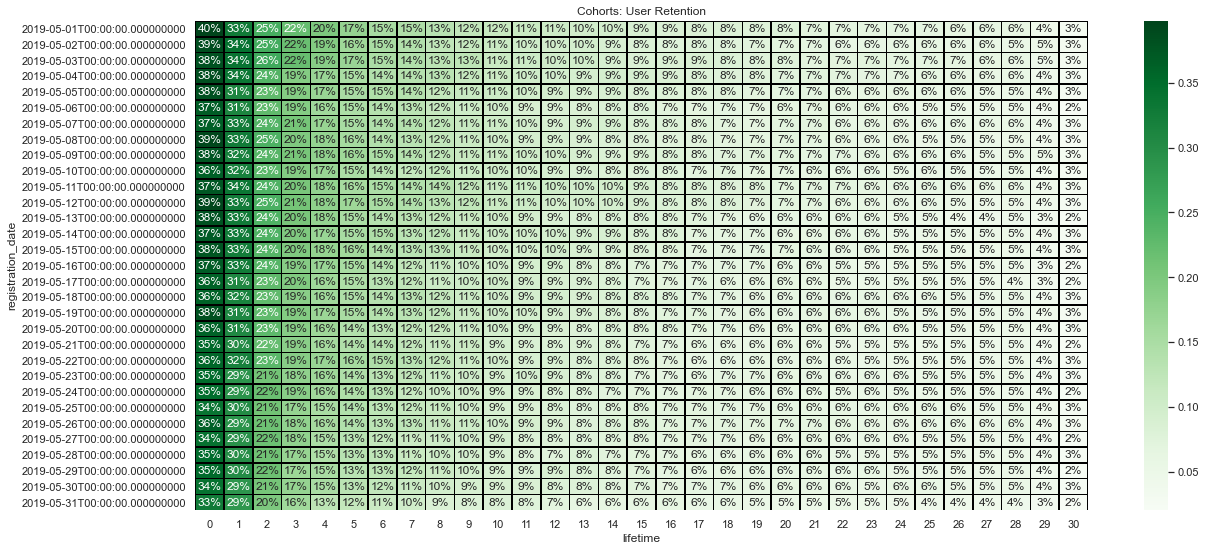

In [108]:
import seaborn as sns
from matplotlib import pyplot as plt
# Такую таблицу за май удобно визуализировать с помощью heatmap в библиотеке seaborn:
sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot5, mask=retention_pivot5.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens");

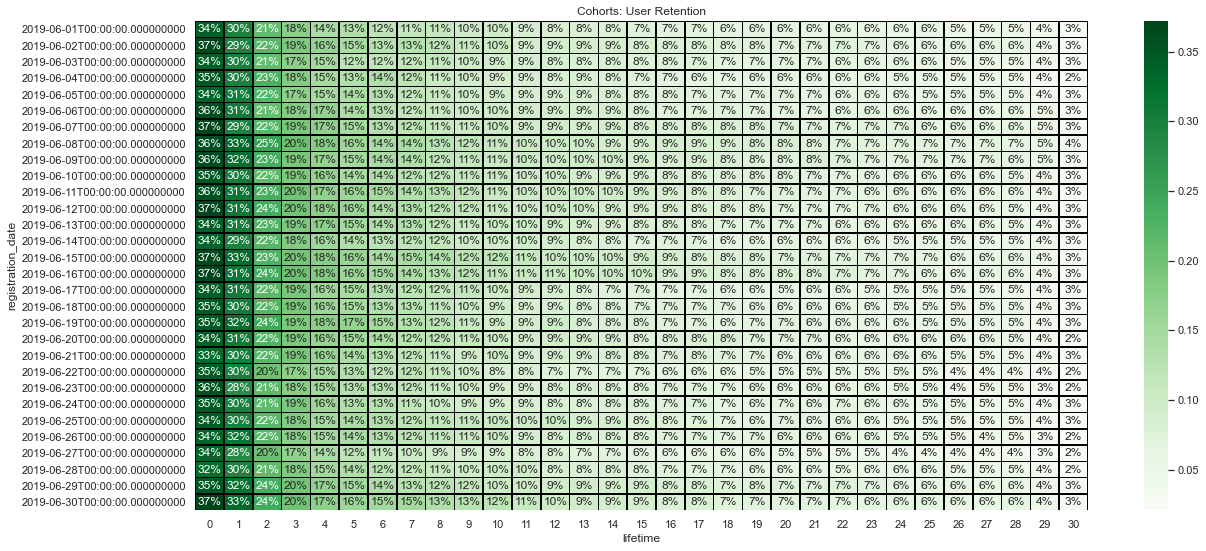

In [109]:
# Такую таблицу за июнь удобно визуализировать с помощью heatmap в библиотеке seaborn:
sns.set(style='white')
plt.figure(figsize=(20, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot6, mask=retention_pivot6.isnull(), annot=True, fmt='.0%', linewidths=0.5, linecolor='black', cmap="Greens");

<AxesSubplot:xlabel='registration_date'>

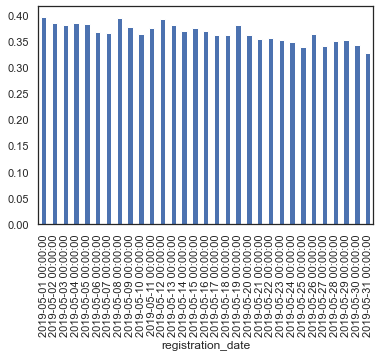

In [110]:
# С помощью retention_pivot удобно визуализировать изменения Retention Rate по каждой когорте с течением времени. 
# Построим, например, как в зависимости от когорты изменяется Retention Rate на нулевой день.
retention_pivot5[0].plot.bar()

<AxesSubplot:xlabel='registration_date'>

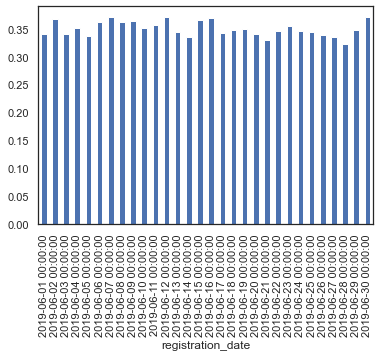

In [111]:
# С помощью retention_pivot удобно визуализировать изменения Retention Rate по каждой когорте с течением времени. 
# Построим, например, как в зависимости от когорты изменяется Retention Rate на нулевой день.
retention_pivot6[0].plot.bar()

<AxesSubplot:xlabel='registration_date'>

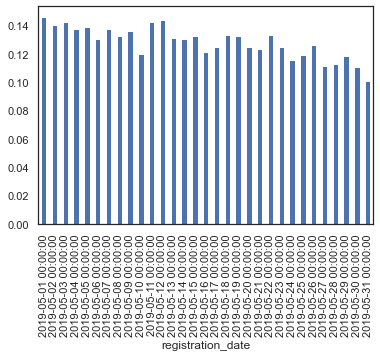

In [112]:
retention_pivot5[7].plot.bar() # Построим, например, как в зависимости от когорты изменяется Retention Rate на седьмой день (май).

<AxesSubplot:xlabel='registration_date'>

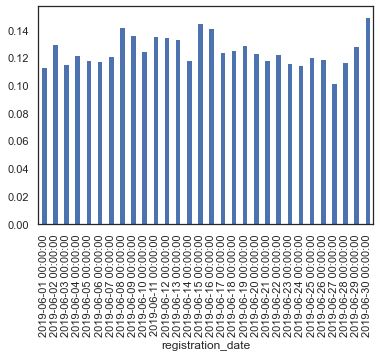

In [113]:
retention_pivot6[7].plot.bar() # Построим, например, как в зависимости от когорты изменяется Retention Rate на седьмой день (июнь).

In [114]:
# Найдём относительное изменение Retention Rate на седьмой день для когорты 31 мая 2019 года относительно когорты 1 мая 2019 года.
retention_pivot5[7]['2019-05-31']/retention_pivot5[7]['2019-05-01'] 

0.6889460885141001

In [115]:
# Найдём относительное изменение Retention Rate на седьмой день для когорты 30 июня 2019 года относительно когорты 1 июня 2019 года.
retention_pivot6[7]['2019-06-30']/retention_pivot6[7]['2019-06-01'] 

1.3244076718481195

In [116]:
def getRevenue5(): # Напишем SQL-запрос, который позволит получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в мае 2019 года
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue5 = pd.DataFrame(getRevenue5()) # после чего получим данные по запросу и запишем в датафрейм revenue

In [117]:
def getRevenue6(): # Напишем SQL-запрос, который позволит получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в июне 2019 года
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue6 = pd.DataFrame(getRevenue6()) # после чего получим данные по запросу и запишем в датафрейм revenue

In [118]:
revenue5.info() # Взглянем на основную информацию по колонкам датафрейма revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      912 non-null    object 
 1   registration_date         912 non-null    object 
 2   users_count_with_revenue  912 non-null    int64  
 3   revenue                   912 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6+ KB


In [119]:
revenue6.info() # Взглянем на основную информацию по колонкам датафрейма revenue

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      833 non-null    object 
 1   registration_date         833 non-null    object 
 2   users_count_with_revenue  833 non-null    int64  
 3   revenue                   833 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.2+ KB


In [120]:
for col in ['date','registration_date']: # колонки с датами содержат тип object
    revenue5[col] = pd.to_datetime(revenue5[col]) # Произведём преобразование типов к datetime
    revenue6[col] = pd.to_datetime(revenue6[col]) 

In [121]:
revenue5.head() # Посмотрим на первые строки датафрейма revenue

,date,registration_date,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,1672,2357.590
1,2019-05-02,2019-05-01,1420,514.679
2,2019-05-02,2019-05-02,1367,1629.140
3,2019-05-03,2019-05-01,1048,390.952
4,2019-05-03,2019-05-02,1164,533.608


In [122]:
revenue6.head() # Посмотрим на первые строки датафрейма revenue

,date,registration_date,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1082,1611.860
1,2019-06-02,2019-06-01,928,317.738
2,2019-06-02,2019-06-02,1257,1305.220
3,2019-06-03,2019-06-01,623,192.273
4,2019-06-03,2019-06-02,1008,554.859


In [123]:
revenue5['revenue'].sum() # посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся в мае

121998.29795000001

In [124]:
revenue6['revenue'].sum() # посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся в июне

79685.877867

In [125]:
registered_users_count5['registered_users_count'].sum() # сколько всего было таких пользователей

188943

In [126]:
registered_users_count6['registered_users_count'].sum() # сколько всего было таких пользователей

100423

In [127]:
revenue5['revenue'].sum()/registered_users_count5['registered_users_count'].sum() # средняя выручка за месяц с пользователей, зарегистрировавшихся в мае

0.6456883713606749

In [128]:
revenue6['revenue'].sum()/registered_users_count6['registered_users_count'].sum() # средняя выручка за месяц с пользователей, зарегистрировавшихся в июне

0.7935022640928872

In [129]:
revenue5 = revenue5.rename(columns={'date':'activity_date'}) # Переименуем колонки
revenue6 = revenue6.rename(columns={'date':'activity_date'}) 

In [130]:
retention_table_with_revenue5 = retention_table5.merge(revenue5,on=['registration_date','activity_date'],how='left') # объединим датафреймы в новый датафрейм
retention_table_with_revenue6 = retention_table6.merge(revenue6,on=['registration_date','activity_date'],how='left') 

In [131]:
retention_table_with_revenue5.head() # Посмотрим на получившийся объединённый датафрейм

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672.0,2357.590
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420.0,514.679
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367.0,1629.140
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048.0,390.952
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164.0,533.608


In [132]:
retention_table_with_revenue6.head() # Посмотрим на получившийся объединённый датафрейм

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.860
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.738
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.220
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.273
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.859


In [133]:
retention_table_with_revenue5.info() # видим, что есть пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   activity_date             961 non-null    datetime64[ns]
 1   registration_date         961 non-null    datetime64[ns]
 2   active_users_count        961 non-null    int64         
 3   registered_users_count    961 non-null    int64         
 4   retention_rate            961 non-null    float64       
 5   lifetime                  961 non-null    int32         
 6   users_count_with_revenue  912 non-null    float64       
 7   revenue                   912 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2)
memory usage: 63.8 KB


In [134]:
retention_table_with_revenue6.info() # видим, что есть пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   activity_date             930 non-null    datetime64[ns]
 1   registration_date         930 non-null    datetime64[ns]
 2   active_users_count        930 non-null    int64         
 3   registered_users_count    930 non-null    int64         
 4   retention_rate            930 non-null    float64       
 5   lifetime                  930 non-null    int32         
 6   users_count_with_revenue  833 non-null    float64       
 7   revenue                   833 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(1), int64(2)
memory usage: 61.8 KB


In [135]:
for col in ['revenue','users_count_with_revenue']: # Произведём замену пропущенных значений на 0 с помощью функции fillna()
    retention_table_with_revenue5[col] = retention_table_with_revenue5[col].fillna(0) 
    retention_table_with_revenue6[col] = retention_table_with_revenue6[col].fillna(0) 

In [136]:
# Преобразуем тип в колонке users_count_with_revenue в целочисленный
retention_table_with_revenue5['users_count_with_revenue'] = retention_table_with_revenue5['users_count_with_revenue'].astype(int) 
retention_table_with_revenue6['users_count_with_revenue'] = retention_table_with_revenue6['users_count_with_revenue'].astype(int)

In [139]:
# посчитать показатель ARPPU
retention_table_with_revenue5['arppu'] = retention_table_with_revenue5['revenue']/retention_table_with_revenue5['users_count_with_revenue'] 
retention_table_with_revenue6['arppu'] = retention_table_with_revenue6['revenue']/retention_table_with_revenue6['users_count_with_revenue']  

In [140]:
# применим формулу, чтобы рассчитать значение для колонки arpu, которая бы для каждого дня и каждой когорты содержала показатель средней выручки на активного пользователя
retention_table_with_revenue5['arppu_au'] = retention_table_with_revenue5['revenue'] / retention_table_with_revenue5['active_users_count'] 
retention_table_with_revenue6['arppu_au'] = retention_table_with_revenue6['revenue'] / retention_table_with_revenue6['active_users_count'] 

In [141]:
retention_table_with_revenue5.head() # Посмотрим что получилось

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arpu,arpu_au,arppu,arppu_au
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672,2357.590,1.410042,0.910266,1.410042,0.910266
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420,514.679,0.362450,0.239832,0.362450,0.239832
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367,1629.140,1.191763,0.795090,1.191763,0.795090
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048,390.952,0.373046,0.238822,0.373046,0.238822
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164,533.608,0.458426,0.293675,0.458426,0.293675


In [142]:
retention_table_with_revenue6.head() # Посмотрим что получилось

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arpu,arpu_au,arppu,arppu_au
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082,1611.860,1.489704,0.976293,1.489704,0.976293
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928,317.738,0.342390,0.222350,0.342390,0.222350
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257,1305.220,1.038361,0.675230,1.038361,0.675230
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623,192.273,0.308624,0.188318,0.308624,0.188318
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008,554.859,0.550455,0.357974,0.550455,0.357974


In [145]:
retention_7_may_table=retention_table_with_revenue5[retention_table_with_revenue5['lifetime']==7] 
retention_7_june_table=retention_table_with_revenue6[retention_table_with_revenue6['lifetime']==7] 

In [148]:
retention_7_may=retention_7_may_table['active_users_count'].sum()/retention_7_may_table['registered_users_count'].sum() 
print(retention_7_may) # Retention Rate седьмого дня: до внедрения фичи

0.12933000957960866

In [149]:
retention_7_june=retention_7_june_table['active_users_count'].sum()/retention_7_june_table['registered_users_count'].sum() 
print(retention_7_june) # Retention Rate седьмого дня: после внедрения фичи

0.12560867530346634


In [154]:
arppu_may = retention_table_with_revenue5['revenue'].sum() / retention_table_with_revenue5['users_count_with_revenue'].sum() 
print(arppu_may) # ARPPU: до внедрения фичи

0.30612457926102504


In [155]:
arppu_june = retention_table_with_revenue6['revenue'].sum() / retention_table_with_revenue6['users_count_with_revenue'].sum() 
print(arppu_june) # ARPPU: после внедрения фичи

0.39319401107750307


## Вывод: 
- показатели Retention Rate седьмого дня почти не изменились 
- ARPPU за два периода: до внедрения фичи 0,31 у.е. и после внедрения фичи 0,39 у.е. - выросла, значит фича оказалась полезной!